In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from PIL import Image
%matplotlib inline

In [2]:
from tqdm import tqdm
from os.path import isfile
from urllib.request import urlretrieve

image_data = "lyft_training_data.tar.gz"

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(image_data):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='image data') as pbar:
        urlretrieve(
            'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/Lyft_Challenge/Training+Data/lyft_training_data.tar.gz',
            image_data,
            pbar.hook)


image data: 608MB [05:04, 2.00MB/s]                                                                                    


In [3]:
import tarfile

targz = tarfile.open(image_data, 'r')
targz.extractall()

In [10]:
def DisplayImage(img1, img2, title1, title2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img1)
    ax1.set_title(title1, fontsize=10)
    ax2.imshow(img2[:,:,0])
    ax2.set_title(title2, fontsize=10)

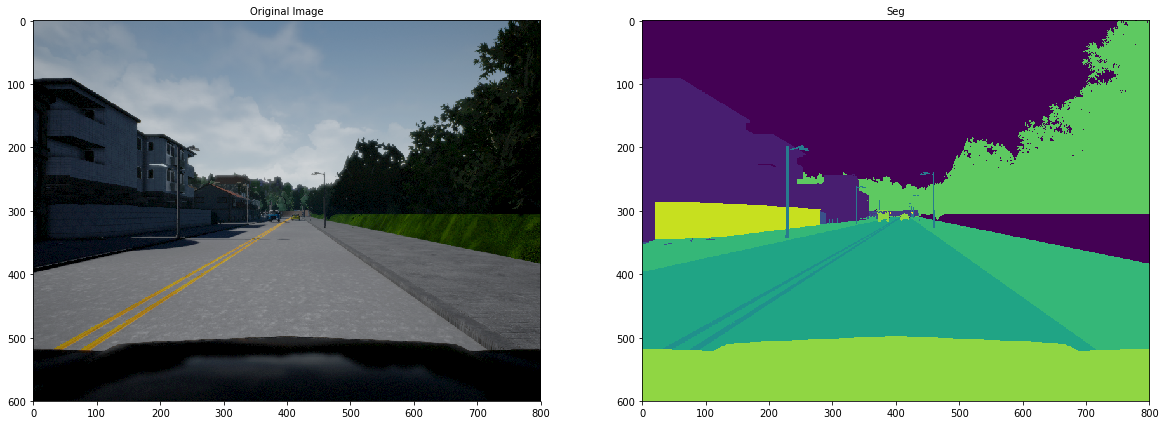

In [11]:
img = mpimg.imread('Train/CameraRGB/0.png')
img2 = mpimg.imread('Train/CameraSeg/0.png')
DisplayImage(img, img2, 'Original Image', 'Seg')